In [50]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lightgbm
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingClassifier
import catboost

# MonthlyRevenue
OverageMinutes               0.787317
MonthlyMinutes               0.712734
PeakCallsInOut               0.642019
TotalRecurringCharge         0.629391
ReceivedCalls                0.604762

In [52]:
data = pd.read_csv('./data/train.csv')
data = data.drop(columns=['CustomerID']).dropna().reset_index(drop=True)
data.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,...,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000
mean,58.717374,525.021466,46.834961,0.891841,39.754040,1.226327,-11.656175,-1.175937,6.010556,4.077814,...,1.805093,1.558711,380.020843,31.338258,21.147592,0.035496,0.018331,0.051475,4.402677,0.053686
std,44.317244,528.510155,23.759492,2.224725,96.091606,9.848360,255.858193,39.392124,9.036653,10.836468,...,1.330834,0.906256,252.290072,22.091593,23.926589,0.201964,0.142854,0.266490,3.110498,0.382677
min,-6.170000,0.000000,-6.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.000000,0.700000,0.000000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,48.380000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,1.000000,...,1.000000,1.000000,330.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,70.910000,722.000000,60.000000,0.990000,40.000000,0.300000,65.000000,1.600000,7.700000,3.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,324.700000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,16.000000,9.000000,25.000000


In [66]:
data.Churn.value_counts()

Churn
No     35507
Yes    14245
Name: count, dtype: int64

In [65]:
data.query('`HandsetPrice` == "100"').Churn.value_counts()

Churn
No     884
Yes    325
Name: count, dtype: int64

<Axes: ylabel='DirectorAssistedCalls'>

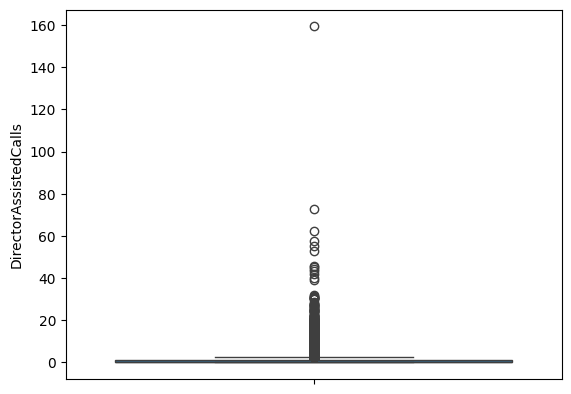

In [67]:
sns.boxplot(
    data.DirectorAssistedCalls,
)

In [71]:
data1 = data.query('`DirectorAssistedCalls` < 20 ')

In [70]:
data

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49747,No,0.00,76.0,30.0,0.00,0.0,0.0,0.0,0.0,5.7,...,0,4,No,0,Unknown,No,2-High,Other,Professional,No
49748,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,...,0,3,No,0,Unknown,No,3-Good,Other,Other,Yes
49749,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,...,0,7,No,0,Unknown,No,1-Highest,Other,Professional,Unknown
49750,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,4.0,...,0,2,No,0,30,No,5-Low,Other,Professional,Yes


In [86]:
data1 = data1.query('`OverageMinutes` < 50')

<Axes: ylabel='OverageMinutes'>

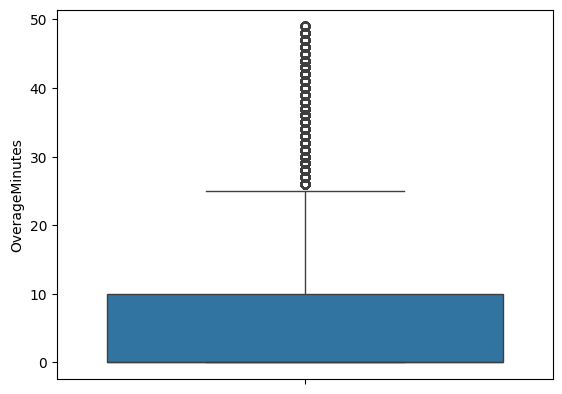

In [87]:
sns.boxplot(
    data1.OverageMinutes,
)

In [89]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36369 entries, 0 to 49751
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      36369 non-null  object 
 1   MonthlyRevenue             36369 non-null  float64
 2   MonthlyMinutes             36369 non-null  float64
 3   TotalRecurringCharge       36369 non-null  float64
 4   DirectorAssistedCalls      36369 non-null  float64
 5   OverageMinutes             36369 non-null  float64
 6   RoamingCalls               36369 non-null  float64
 7   PercChangeMinutes          36369 non-null  float64
 8   PercChangeRevenues         36369 non-null  float64
 9   DroppedCalls               36369 non-null  float64
 10  BlockedCalls               36369 non-null  float64
 11  UnansweredCalls            36369 non-null  float64
 12  CustomerCareCalls          36369 non-null  float64
 13  ThreewayCalls              36369 non-null  float64


In [101]:
label_encoders = {}
for column in ('Churn','ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice', 'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode','Occupation', 'MaritalStatus'):
    label_encoder = LabelEncoder()
    data1.loc[:, column] = label_encoder.fit_transform(data1[column])

    label_encoders.update({column: label_encoder})

C:\Users\USER\AppData\Local\Temp\ipykernel_4132\2024488856.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 0 ... 0 0 0]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  data1.loc[:, column] = label_encoder.fit_transform(data1[column])
C:\Users\USER\AppData\Local\Temp\ipykernel_4132\2024488856.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[644 596 345 ... 397 311 282]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  data1.loc[:, column] = label_encoder.fit_transform(data1[column])
C:\Users\USER\AppData\Local\Temp\ipykernel_4132\2024488856.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 1 1 ... 0 0 1]' has dtype incompatible with category, please explicitly cast to a 

In [103]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36369 entries, 0 to 49751
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      36369 non-null  int32  
 1   MonthlyRevenue             36369 non-null  float64
 2   MonthlyMinutes             36369 non-null  float64
 3   TotalRecurringCharge       36369 non-null  float64
 4   DirectorAssistedCalls      36369 non-null  float64
 5   OverageMinutes             36369 non-null  float64
 6   RoamingCalls               36369 non-null  float64
 7   PercChangeMinutes          36369 non-null  float64
 8   PercChangeRevenues         36369 non-null  float64
 9   DroppedCalls               36369 non-null  float64
 10  BlockedCalls               36369 non-null  float64
 11  UnansweredCalls            36369 non-null  float64
 12  CustomerCareCalls          36369 non-null  float64
 13  ThreewayCalls              36369 non-null  float64


In [242]:
data1 = data1.astype(dict(zip(np.extract(data1.dtypes == 'int32', data1.columns), ['category']*23)))

In [240]:
scale = data1.columns

In [251]:
scale

Index(['Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'DirectorAssistedCalls',
       'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes',
       'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls',
       'CustomerCareCalls', 'ThreewayCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'ActiveSubs', 'ServiceArea',
       'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'RVOwner',
       'BuysViaMailOrder', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer',
       'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser',
       'ReferralsMadeBySubscriber', 'OwnsMotorcycle',
       'AdjustmentsToCreditRating', 'HandsetPrice', 'CreditRating',
       'PrizmCode', 'Occupation', 'MaritalStatus'],
      dtype='object')

In [243]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36369 entries, 0 to 49751
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Churn                      36369 non-null  category
 1   MonthlyRevenue             36369 non-null  float64 
 2   MonthlyMinutes             36369 non-null  float64 
 3   DirectorAssistedCalls      36369 non-null  float64 
 4   OverageMinutes             36369 non-null  float64 
 5   RoamingCalls               36369 non-null  float64 
 6   PercChangeMinutes          36369 non-null  float64 
 7   PercChangeRevenues         36369 non-null  float64 
 8   DroppedCalls               36369 non-null  float64 
 9   BlockedCalls               36369 non-null  float64 
 10  CustomerCareCalls          36369 non-null  float64 
 11  ThreewayCalls              36369 non-null  float64 
 12  CallForwardingCalls        36369 non-null  float64 
 13  CallWaitingCalls           36369 non

In [211]:
((data1.corr()>0.6).sum() > 1).sum()

0

In [204]:
data1.corr().RVOwner.sort_values(ascending=False)

RVOwner                      1.000000
TruckOwner                   0.612597
AgeHH1                       0.166982
BuysViaMailOrder             0.154722
ChildrenInHH                 0.141442
MaritalStatus                0.132846
OwnsComputer                 0.101615
OwnsMotorcycle               0.097724
PrizmCode                    0.083426
ActiveSubs                   0.050173
MonthsInService              0.047642
Occupation                   0.044455
CurrentEquipmentDays         0.034719
NonUSTravel                  0.031825
NotNewCellphoneUser          0.026589
OptOutMailings               0.023858
NewCellphoneUser             0.010056
PercChangeMinutes            0.008724
PercChangeRevenues           0.005956
HandsetModels                0.004877
RoamingCalls                 0.004560
HandsetPrice                 0.002627
ReferralsMadeBySubscriber    0.000743
AdjustmentsToCreditRating    0.000188
CallForwardingCalls         -0.001967
HandsetRefurbished          -0.002319
ServiceArea 

<Axes: >

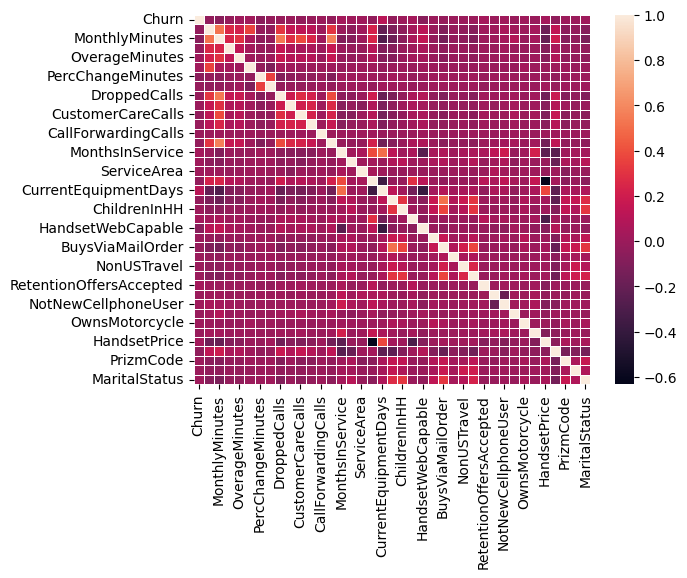

In [209]:
sns.heatmap(
    data1.iloc[:, :].corr(),
    linewidths=0.5
)

Handsets

In [244]:
train, temp = train_test_split(data1, test_size= 0.4, random_state=0)
valid, test = train_test_split(temp, test_size= 0.5, random_state=0)

In [246]:
lgbm = lightgbm.LGBMClassifier(verbose = 0)
lgbm.fit(train.drop(columns=['Churn']), train['Churn'],
        eval_set= [(valid.drop(columns=['Churn']), valid['Churn'])],
        
        )

lgbm.score(test.drop(columns=['Churn']), test['Churn'])

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.


0.7183117954357987

In [ ]:
lgbm = lightgbm.LGBMClassifier(max_depth=)

In [212]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [219]:
from sklearn.model_selection import GridSearchCV

model = lightgbm.LGBMClassifier()

parameters = {
    'learning_rate': np.arange(0.1, 0.5),
    'n_estimators': range(100, 300, 50),
    'max_depth' : range(10, 30)
    }

grid_search = RandomizedSearchCV(model, parameters, n_jobs=-1)

In [247]:
smote = SMOTE(random_state=0)
x_train = data1.drop(columns=['Churn'])
y_train = data1['Churn']

x_new_train, y_new_train = smote.fit_resample(x_train, y_train)

In [221]:
grid_search.fit(x_new_train, y_new_train)

RandomizedSearchCV(estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1]),
                                        'max_depth': range(10, 30),
                                        'n_estimators': range(100, 300, 50)})

In [222]:
grid_search.best_params_

{'n_estimators': 100, 'max_depth': 16, 'learning_rate': 0.1}

In [248]:
lgbm = lightgbm.LGBMClassifier(
    n_estimators = 100,
    max_depth = 16, 
    learning_rate = 0.1
)

In [249]:
lgbm.fit(x_new_train, y_new_train,
        eval_set= [(valid.drop(columns=['Churn']), valid['Churn'])],
        
        )

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.


LGBMClassifier(max_depth=16)

In [250]:
lgbm.score(test.drop(columns=['Churn']), test['Churn'])

0.6097058014847402

In [230]:
data1

,Churn,MonthlyRevenue,MonthlyMinutes,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,CreditRating,PrizmCode,Occupation,MaritalStatus
0,1,24.00,219.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,0,0,0,0,0,8,0,2,4,0
1,1,16.99,10.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,...,1,0,0,0,0,8,3,2,4,2
2,0,38.00,8.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,...,1,0,0,0,0,15,2,3,1,2
3,0,82.28,1312.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,...,1,0,0,0,0,0,3,0,3,0
4,1,17.14,0.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,...,0,1,0,0,1,0,0,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49746,1,38.34,320.0,0.99,21.0,0.0,-66.0,-8.3,12.3,2.3,...,0,0,0,0,0,15,0,0,4,0
49747,0,0.00,76.0,0.00,0.0,0.0,0.0,0.0,5.7,1.0,...,0,0,0,0,0,15,1,0,4,0
49748,0,31.92,63.0,0.00,43.0,0.0,-38.0,-13.2,0.7,0.0,...,0,0,0,0,0,15,2,0,3,2
49749,0,71.99,724.0,0.00,4.0,0.9,-40.0,-2.0,14.3,1.0,...,0,0,0,0,0,15,0,0,4,1


In [ ]:
results = {}
stratified_k_fold = StratifiedKFold(random_state=0, shuffle=True)  # n_splits: 5 (default)

for i, (train_index, test_index) in enumerate(stratified_k_fold.split(diamonds, diamonds.cut)):
    temp = diamonds.iloc[train_index]
    test = diamonds.iloc[test_index]
    train, valid = train_test_split(temp, test_size= len(test)/len(temp))
    

    lgbm = LGBMClassifier(verbose=1)
    #

    parameters = {
        'max_depth': np.random.randint(1, 10, 5),
        'n_estimators': np.random.randint(50, 500, 20),
        'min_samples_split' : np.random.randint(50, 500, 20),
        }

    random_search = RandomizedSearchCV(lgbm, parameters, random_state=0)
    random_search.fit(train.drop(columns=['cut']), train.cut,)

    index_best_param = random_search.cv_results_.get('rank_test_score').argmax()
    best_params = random_search.cv_results_.get('params')[index_best_param]

    lgbm =LGBMClassifier(
        n_estimators = best_params.get('n_estimators'),
        min_samples_split = best_params.get('min_samples_split'),
        max_depth = best_params.get('max_depth'),
        random_state=0
    ).fit(train.drop(columns=['cut']), train.cut)

    confusion_matrix_result = confusion_matrix(
        test.cut,
        lgbm.predict(test.drop(columns=['cut']))
    )

    TP = confusion_matrix_result[0, 0]
    FN = confusion_matrix_result[0, 1]
    FP = confusion_matrix_result[1, 0]
    TN = confusion_matrix_result[1, 1]

    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1 = 2*precision*recall/(precision+recall)

    accuracy = (TP+TN) / (TP+TN+FP+FN)

    results.update({
        f'fold{i+1}':{
        "precision": float(precision),
        "recall": float(recall),
        "f1": float(f1),
        "accuracy": float(accuracy),
        "best_params": best_params
        }
    })

    print(f'fold:{i+1}| prescision: {precision: .2f}, recall: {recall: .2f}, f1: {f1: .2f}, accuracy: {accuracy: .2f}')